In [2]:
# Importing the libraries

import warnings 
warnings.filterwarnings('ignore')

# libraries for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.gridspec as gridspec
from collections import Counter
import plotly.offline as py
py.init_notebook_mode(connected=True)

# libraries for modelling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score, roc_curve, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv('./creditcard.csv')

In [5]:
data.shape

(284807, 31)

In [6]:
data.head().style.set_properties(**{"background-color":"black",
                           "color" : "yellow"})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
data[['Time', 'Amount']].describe().style.set_properties(**{"background-color":"black",
                           "color" : "yellow"})

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [10]:
# Descriptive statistics of  of frauds transactions

summary = (data[data['Class'] == 1].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['skyblue']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [150,60,100,100,80,80,80,80,80])
layout = go.Layout(dict(title = "Summary for fraudulent Transactions"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [11]:
# Descriptive statistics of geniune transactions

summary = (data[data['Class'] == 0].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['lightgreen']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [130,100,100,100,80,80,80,80,80])
layout = go.Layout(dict(title = "Summary for Geniune Transactions"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [12]:
# Percentages of fraudulent and non-fradulent transactions in data

print(f'Percent of Non-Fraudulent Transactions = {round(data["Class"].value_counts()[0]/len(data) * 100,3)}%')
print(f'Percent of Fraudulent Transactions = {round(data["Class"].value_counts()[1]/len(data) * 100,3)}%')

Percent of Non-Fraudulent Transactions = 99.827%
Percent of Fraudulent Transactions = 0.173%


In [13]:
# plotting a pie chart for fraud and non-fraud transactions

fraud_or_not = data["Class"].value_counts().tolist()

labels = ['Not Fraud','Frauds']
values = [fraud_or_not[0], fraud_or_not[1]]
colors = ['skyblue', 'red']

trace = go.Pie(labels=labels, values=values, textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, line=dict(color='#000000', width=0.1)))

plotly.offline.iplot([trace], filename='styled_pie_chart')

In [14]:
print('\n\033[1m  Fraudulent Transaction Distribution by amount \033[0m')
print("-"*50)
print(data[(data['Class'] == 1)]['Amount'].value_counts().head())


  Fraudulent Transaction Distribution by amount 
--------------------------------------------------
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


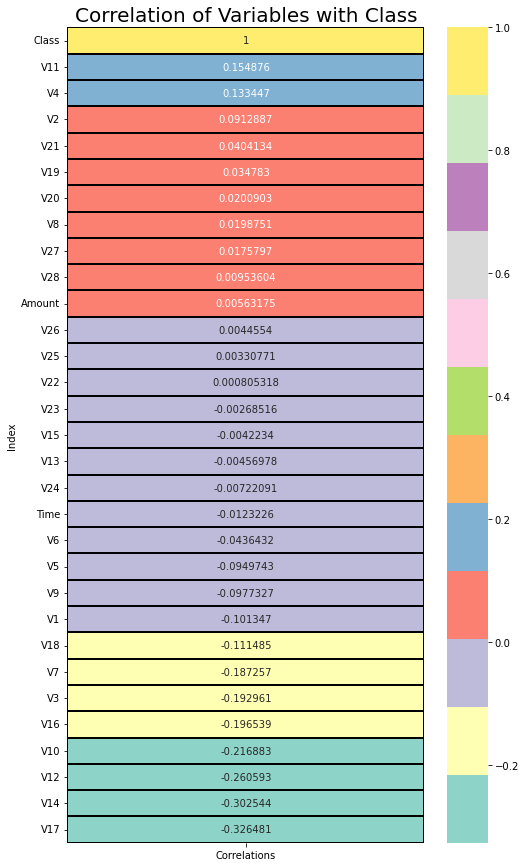

In [15]:
corr = data.corrwith(data['Class']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='black')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

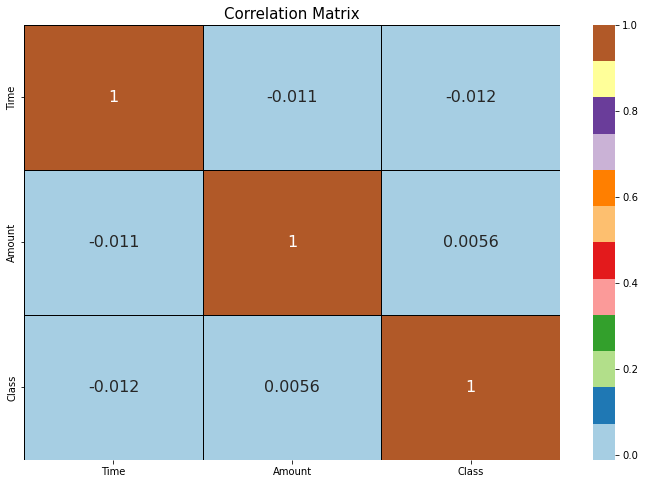

In [16]:
# Heatmap for explainatory variables

plt.subplots(figsize=(12,8))
plt.title("Correlation Matrix", fontsize=15)
sns.heatmap(data[['Time', 'Amount','Class']].corr(),linewidths=0.5, cmap="Paired", linecolor='black',annot=True, annot_kws={'size':16},);

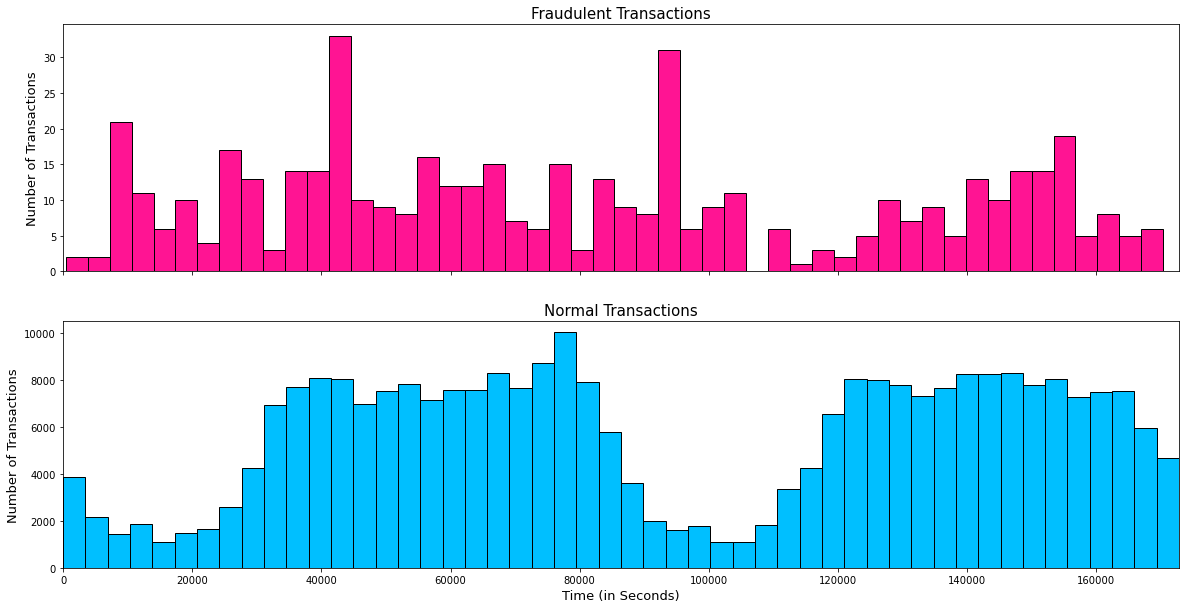

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = data.Time[data.Class == 1]
normal_transactions = data.Time[data.Class == 0]

ax1.hist(fraud_transactions, bins = 50, color='deeppink', edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color='deepskyblue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Normal Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

In [18]:
# converting seconds to time delta to extract hours and mins

timedelta = pd.to_timedelta(data['Time'], unit='s')

data['mins'] = (timedelta.dt.components.minutes).astype(int)
data['hours'] = (timedelta.dt.components.hours).astype(int)

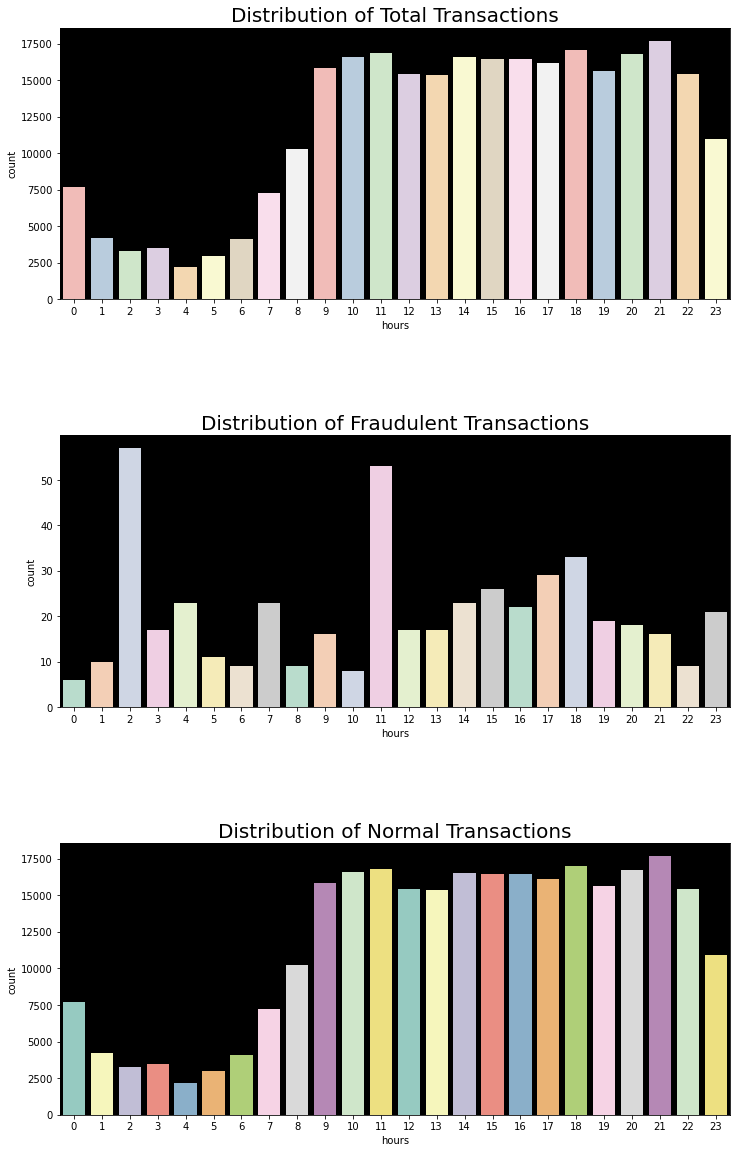

In [19]:
# Countplots for hours vs count of transactions

fig, axs = plt.subplots(3, figsize=(12,20))

fig.subplots_adjust(hspace=.5)

sns.countplot(data['hours'], ax = axs[0], palette="Pastel1")
axs[0].set_title("Distribution of Total Transactions",fontsize=20)
axs[0].set_facecolor("black")

sns.countplot(data[(data['Class'] == 1)]['hours'], ax=axs[1], palette='Pastel2')
axs[1].set_title("Distribution of Fraudulent Transactions", fontsize=20)
axs[1].set_facecolor('black')

sns.countplot(data[(data['Class'] == 0)]['hours'], ax=axs[2], palette='Set3')
axs[2].set_title("Distribution of Normal Transactions", fontsize=20)
axs[2].set_facecolor("black")

plt.show()

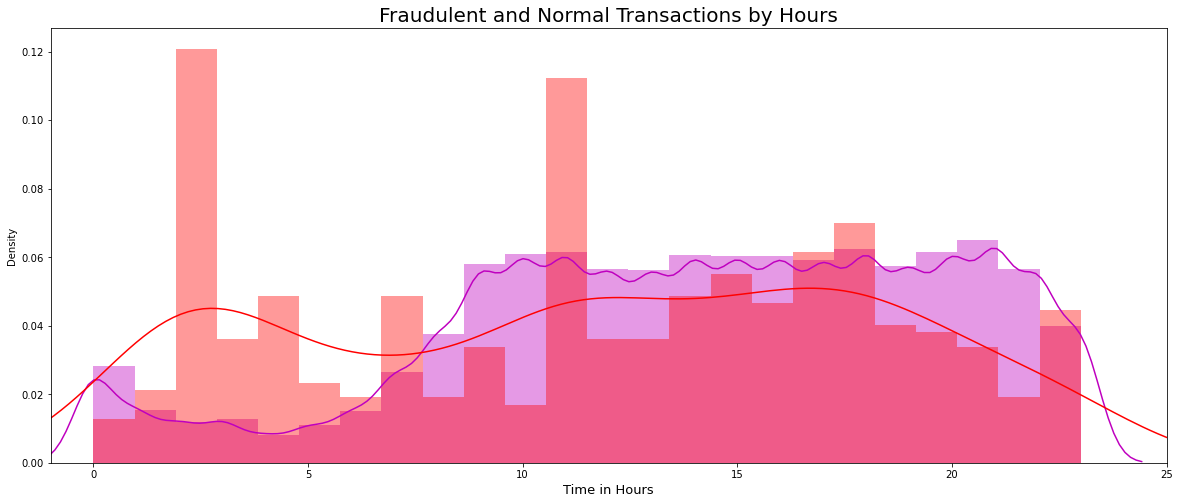

In [20]:
# Exploring the distribuition by Class types throught hours and minutes

plt.figure(figsize=(20,8))

sns.distplot(data[data['Class'] == 0]['hours'], bins=24, color='m')
sns.distplot(data[data['Class'] == 1]["hours"], bins=24, color='r')

plt.title('Fraudulent and Normal Transactions by Hours', fontsize=20)

plt.xlabel("Time in Hours", fontsize=13)
plt.xlim([-1,25])
plt.show()

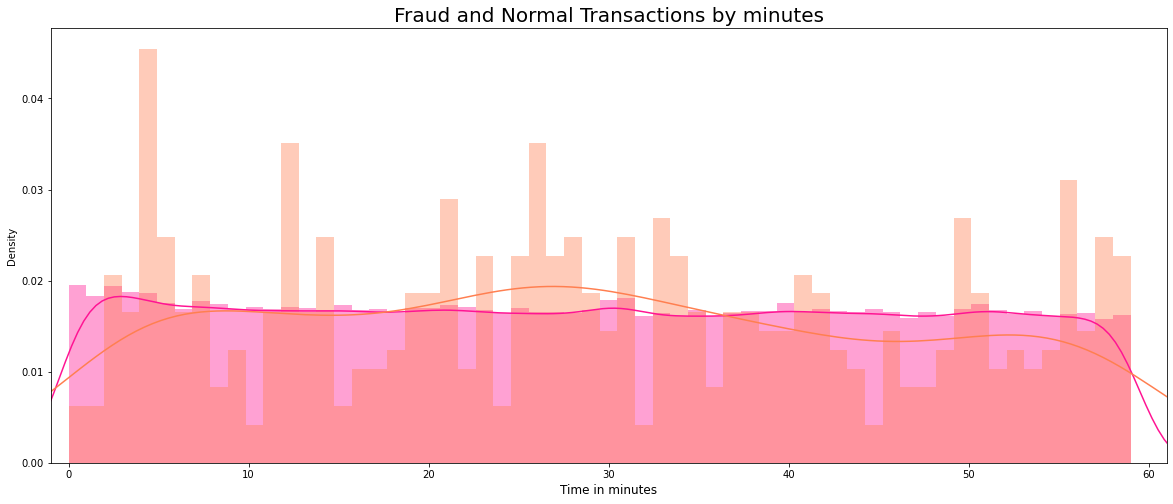

In [21]:
#Exploring the distribuition by Class types throught hours and minutes

plt.figure(figsize=(20,8))

sns.distplot(data[data['Class'] == 0]["mins"], bins =60, color='deeppink')
sns.distplot(data[data['Class'] == 1]["mins"], bins =60, color='coral')

plt.title('Fraud and Normal Transactions by minutes', fontsize=20)
plt.xlim([-1,61])
plt.xlabel("Time in minutes", fontsize=12)
plt.show()

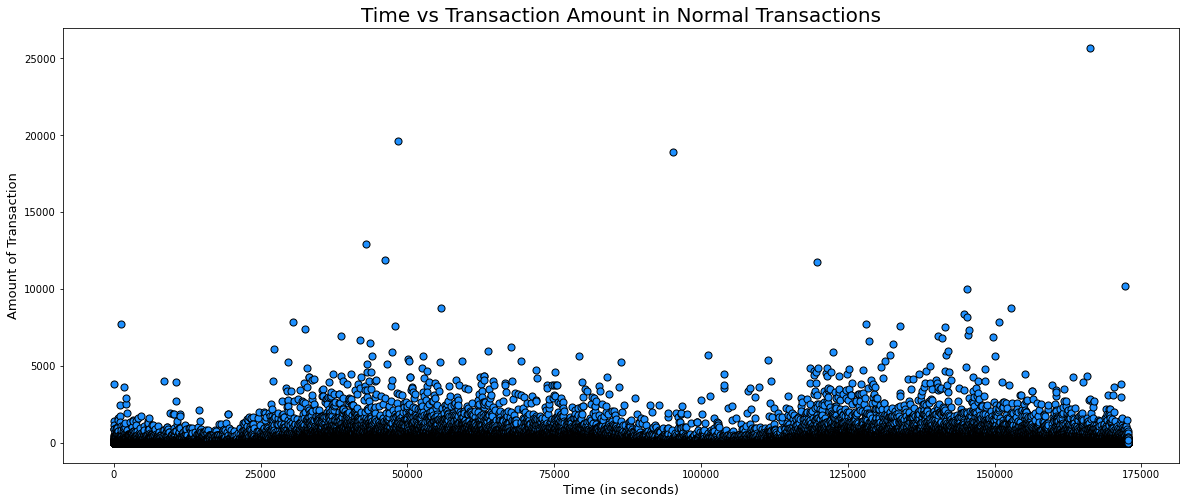

In [22]:
# Scatter plot of Class vs Amount and Time for Normal Transactions 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=data[data['Class'] == 0]['Time'], y=data[data['Class'] == 0]['Amount'], color="dodgerblue", s=50, edgecolor='black')
plt.title("Time vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

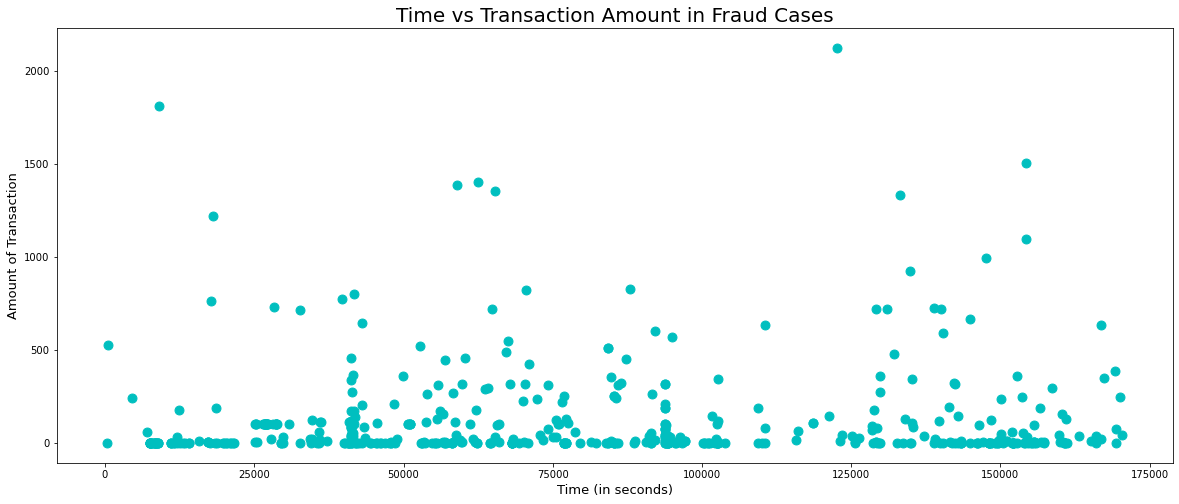

In [23]:
# Scatter plot of Class vs Amount and Time for Fraudulent Transactions 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=data[data['Class'] == 1]['Time'], y=data[data['Class'] == 1]['Amount'], color="c", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

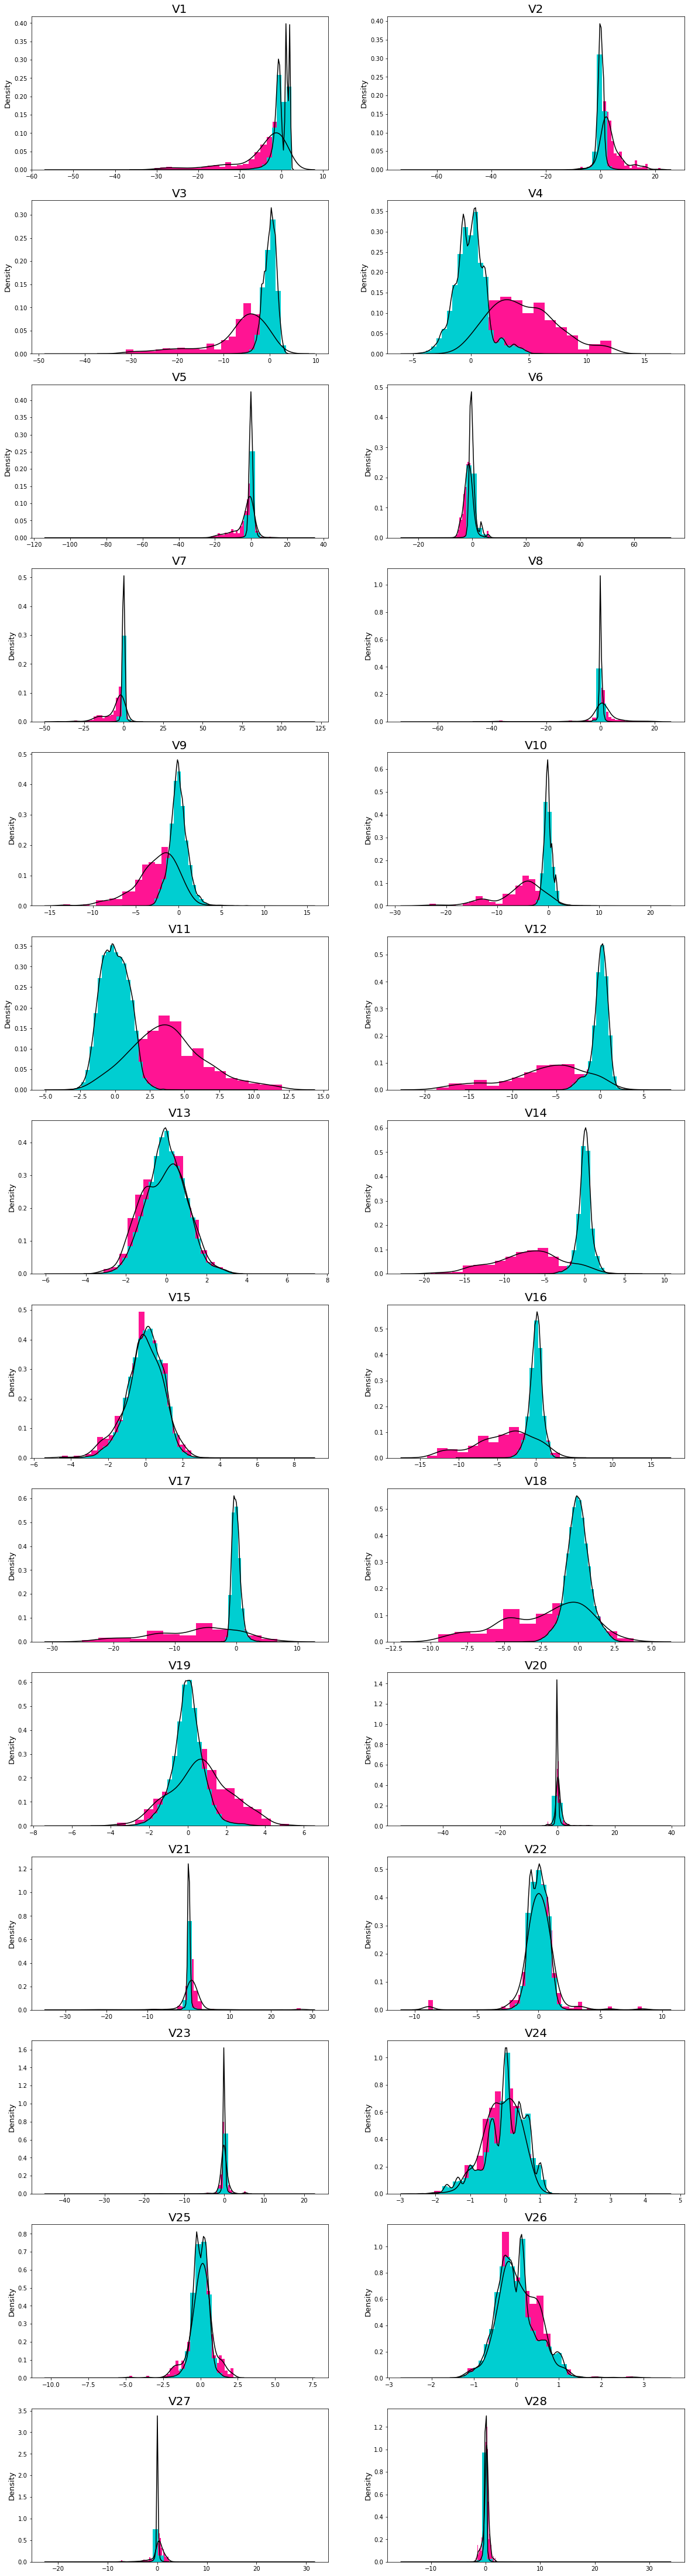

In [24]:
#Looking the V's features
columns = data.iloc[:,1:29].columns

frauds = data.Class == 1
normals = data.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[col][frauds], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(data[col][normals],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()

In [25]:
# copy of data for future use

temp = data.copy()

In [26]:
# Finding the 3rd and 1st Quantile for Amount Column

Q3 = np.percentile(data['Amount'], 75)
Q1 = np.percentile(data['Amount'], 25)

# setting the cutoff
cutoff = 5.0

# computing the interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

# creating a filter to remove values less than lower bound and greater than
# upper bound
filter_data = (data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)

# filtering data
outliers = data[filter_data]['Amount']
fraud_outliers = data[(data['Class'] == 1) & filter_data]['Amount']
normal_outliers = data[(data['Class'] == 0) & filter_data]['Amount']

print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
print(f"Percentage of Fraud amount outliers : {round((fraud_outliers.count()/outliers.count())*100,2)}%")

Total Number of Outliers : 11366
Number of Outliers in Fraudulent Class : 41
No of Outliers in Normal Class : 11325
Percentage of Fraud amount outliers : 0.36%


In [27]:
# dropping the outliers

data = data.drop(outliers.index)
data.reset_index(inplace=True, drop=True)

In [28]:
data.head().style.set_properties(**{"background-color":"black",
                           "color" : "skyblue"})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,mins,hours
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0,0,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0,0,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0,0,0


In [29]:
data.shape

(273441, 33)

In [30]:
# applying log transformation of Amount column

data['Amount'] = np.log(data['Amount'] + 0.001)

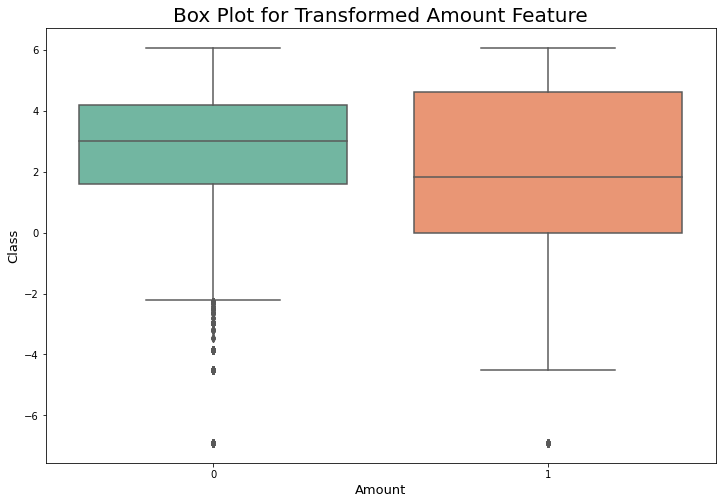

In [31]:
# Box Plot for transformed Amount feature with class

plt.figure(figsize=(12,8))
sns.boxplot(x ="Class", y="Amount", data=data, palette='Set2');
plt.xlabel("Amount", fontsize=13)
plt.ylabel("Class", fontsize=13)
plt.title("Box Plot for Transformed Amount Feature", fontsize=20);

In [32]:
# scaling the time column

robust_scaler = RobustScaler()
data['Time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [33]:
# Divide into X and Y after removing useless columns

X = data.drop(['Class','hours','mins'], 1)
Y = data.Class

In [34]:
# Apply SMOTE

print(f'Original dataset shape : {Counter(Y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


In [35]:
# creating a random sample of 5000 points 

X_vis = X_res.sample(5000, random_state=42)
y_vis = y_res.sample(5000, random_state=42)

print(X_vis.shape)
print(y_vis.shape)

(5000, 30)
(5000,)


In [36]:
# training the t-SNE model to reduce dimensionality
# to 3

tsne3d = TSNE(
    n_components=3,
    random_state=42,
    verbose=2,
).fit_transform(X_vis)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.000s...
[t-SNE] Computed neighbors for 5000 samples in 0.676s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.160s
[t-SNE] Iteration 50: error = 83.4318542, gradient norm = 0.0297419 (50 iterations in 3.243s)
[t-SNE] Iteration 100: error = 74.4190750, gradient norm = 0.0036945 (50 iterations in 3.514s)
[t-SNE] Iteration 150: error = 73.1049042, gradient norm = 0.0020078 (50 iterations in 3.516s)
[t-SNE] Iteration 200: error = 72.5831375, gradient norm = 0.0011808 (50 iterations in 3.543s)
[t-SNE] Iteration 250: error = 72.2753754, gradient norm = 0.0008111

In [37]:
# plotting a 3D scatter plot 

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        color = y_vis,
        colorscale = ['deeppink', 'deepskyblue'],
        colorbar = dict(title = 'Fraud'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.5
    )
)

data=[trace1]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbourhood Embedding)',
              showlegend= False, height=800, width=800,)

fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [38]:
# creating instance of statrifiedkfold split for 5 splits 
strat = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# splitting the data
for train_index, test_index in strat.split(X, Y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = Y.iloc[train_index], Y.iloc[test_index]

Train: [ 29350  29392  29422 ... 273438 273439 273440] Test: [    0     1     2 ... 54742 54743 54744]
Train: [     0      1      2 ... 273438 273439 273440] Test: [ 29350  29392  29422 ... 109415 109416 109417]
Train: [     0      1      2 ... 273438 273439 273440] Test: [ 76259  76295  76304 ... 164124 164125 164126]
Train: [     0      1      2 ... 273438 273439 273440] Test: [144542 144548 144549 ... 218769 218770 218771]
Train: [     0      1      2 ... 218769 218770 218771] Test: [203831 204371 204395 ... 273438 273439 273440]


In [39]:
# Turning the splits into an array

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [40]:
# Creating a utility function to plot correlation matrix and roc_auc_curve

def show_metrics(model, y_test, y_pred):
    fig = plt.figure(figsize=(20, 8))

    # Confusion matrix
    ax = fig.add_subplot(121)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 16}, fmt='g', 
                cmap='Set3', linewidths=1, linecolor='white')

    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels', fontsize=15);
    ax.set_ylabel('True labels', fontsize=15); 
    ax.set_title("Confusion Matix", fontsize=20) 
    ax.xaxis.set_ticklabels(['No Fraud', 'Fraud'], fontsize=12); 
    ax.yaxis.set_ticklabels(['Fraud', 'No Fraud'], fontsize=12);

    # ROC Curve
    fig.add_subplot(122)
    
    
    auc_roc = roc_auc_score(y_test, model.predict(original_Xtest))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(original_Xtest)[:,1])

    plt.plot(fpr, tpr, color='darkturquoise', lw=2, marker='o', label='Trained Model (area = {0:0.3f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], color='deeppink', lw=2, linestyle='--', label= 'No Skill (area = 0.500)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver operating characteristic', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()

In [41]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# specifying the parameter grid for logistic regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Applying RandomsearchCV to find best model
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# iterating over all the splits
for train, test in strat.split(original_Xtrain, original_ytrain):
    
    # create pipeline with smote and the model 
    # sampling_strategy = minority because we want to only resample the minority class
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    # fit the pipeline
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    # finding mean for all the necessary measures to evaluate performance
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print("Accuracy: {0:0.2f}%".format(np.mean(accuracy_lst)*100))
print("Precision: {0:0.2f}".format(np.mean(precision_lst)))
print("Recall: {0:0.2f}".format(np.mean(recall_lst)))
print("f1 Score: {0:0.2f}".format(np.mean(f1_lst)))

Accuracy: 97.49%
Precision: 0.07
Recall: 0.91
f1 Score: 0.13


In [42]:
# predict on test set

y_pred = best_est.predict(original_Xtest)

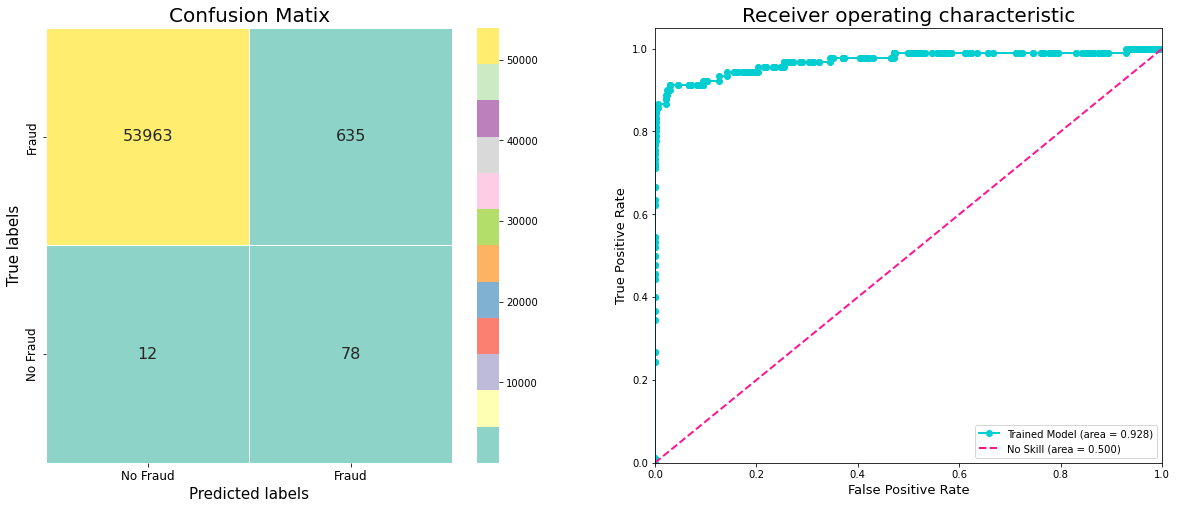

In [43]:
# plot confusion matrix and ROC curve

show_metrics(best_est, original_ytest, y_pred)

In [44]:
# Random forest Classifier
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(original_Xtrain, original_ytrain)
y_pred = rf_cfl.predict(original_Xtest)

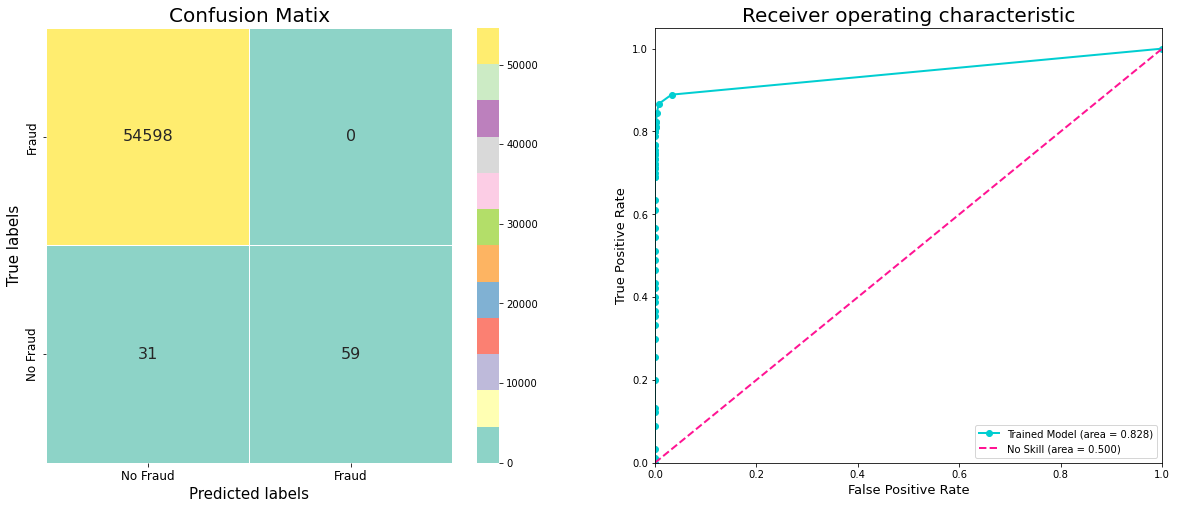

In [45]:
show_metrics(rf_cfl, original_ytest, y_pred)

In [46]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred , original_ytest))) 
print('AUC : {0:0.5f}'.format(roc_auc_score(original_ytest , y_pred)))
print('Precision : {0:0.5f}'.format(precision_score(original_ytest , y_pred)))
print('Recall : {0:0.5f}'.format(recall_score(original_ytest , y_pred)))
print('F1 : {0:0.5f}'.format(f1_score(original_ytest , y_pred)))

Accuracy :0.99943
AUC : 0.82778
Precision : 1.00000
Recall : 0.65556
F1 : 0.79195


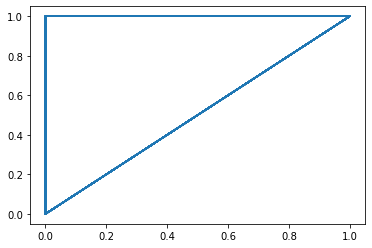

In [56]:
plt.figure()
plt.plot(y_pred , original_ytest)

In [57]:
# training using the best model

best_model = ExtraTreesClassifier(max_depth=50, n_estimators=70, min_samples_split=5, random_state=42)

In [58]:
fitted_model = best_model.fit(original_Xtrain, original_ytrain)

predictions = fitted_model.predict(original_Xtest)

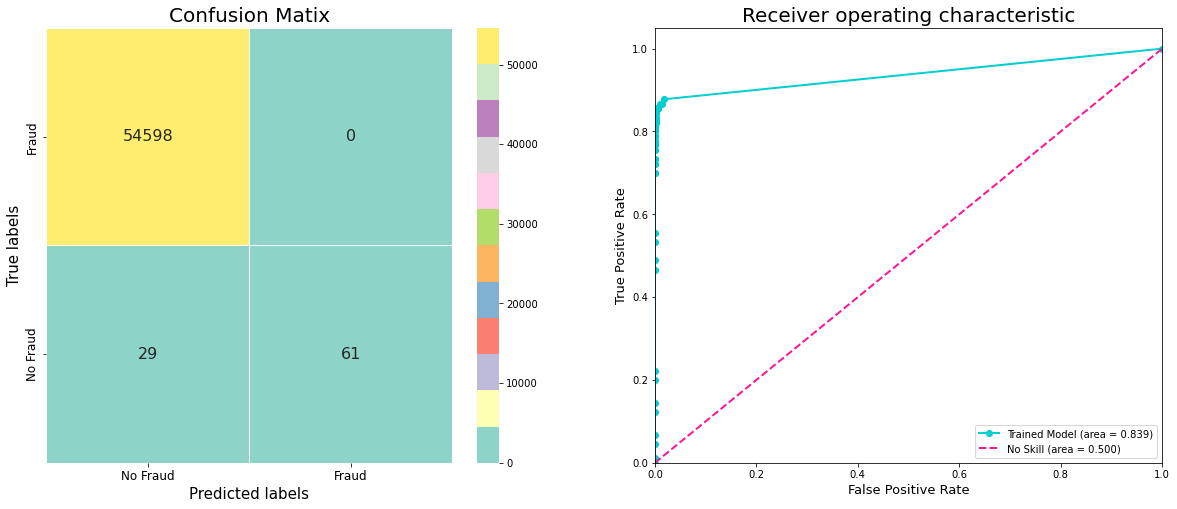

In [59]:
show_metrics(fitted_model, original_ytest, predictions)

In [61]:
# utility function to compute accuracy of normal transactions
def normal_accuracy(values):
    
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    
    return accuracy

# utility function to compute accuracy of fraud transactions
def fraud_accuracy(values):
    
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    
    return accuracy

In [62]:
# create inliers and outliers data

inliers = temp[temp.Class==0]
ins = inliers.drop(['Class'], axis=1)

outliers = temp[temp.Class==1]
outs = outliers.drop(['Class'], axis=1)

In [63]:
# training of isolation forest

ISF = IsolationForest(random_state=42)
ISF.fit(ins)

normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print(f"Accuracy in Detecting Normal Cases: {in_accuracy_isf*100}%")
print(f"Accuracy in Detecting Fraud Cases: {round(out_accuracy_isf*100, 2)}%")

Accuracy in Detecting Normal Cases: 95.62%
Accuracy in Detecting Fraud Cases: 84.35%


In [64]:
# dropping useless columns

new_data = temp.drop(['Time', 'Amount', 'V27', 'V28', 'V25', 'V23', 'V7', 'V13', 'V20','V22','mins','hours'], 1)

In [65]:
# create inliers and outliers data

inliers = new_data[new_data.Class==0]
ins = inliers.drop(['Class'], axis=1)

outliers = new_data[new_data.Class==1]
outs = outliers.drop(['Class'], axis=1)

In [66]:
# training of isolation forest on new data

ISF = IsolationForest(random_state=42)
ISF.fit(ins)

normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print(f"Accuracy in Detecting Normal Cases: {in_accuracy_isf*100}%")
print(f"Accuracy in Detecting Fraud Cases: {out_accuracy_isf*100}%")

Accuracy in Detecting Normal Cases: 95.27%
Accuracy in Detecting Fraud Cases: 87.8%
